# Introduction 
The sinking of Titanic is one of the most notorious shipwredcks in the history. In 1912, during voyage, the titanic sank after colliding with an iceberg. killing 1502 out of 2224 passengers and crew.

<font color=blue>
Content:


1. [Load and Chech data](#1)
1. [Veriable Description](#2)
    * [Univariate Variable Analysis](#3)
        + [Categorical Variable Analysis](#3.1)
        + [Numerical Variable Analysis](#3.2)
1. [Basic Data Analysis](#4)
1. [Outlier Dedection](#5)
1. [Missing Value](#6)
    * [Find Missing Value](#6.1)
    * [Fill Missing Value](#6.2)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # plt.style.available?
import seaborn as sns  # visualization tool
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# plt.style.available?

<a id=1><br>
## Load and Check Data

In [3]:
train_df = pd.read_csv("csv/titanic/train.csv")
test_df = pd.read_csv("csv/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id=2><br>
## Veriable Description
<br>
    
1. PassengerId : uniqe id number to each passanger
1. Survived : passanger survive(1) or died(0)
1. Pclass : passanger class
1. Name : passanger name
1. Sex : gender of passanger
1. Age : age of passanger
1. SibSp : number of siblings/spouses
1. Parch : number of parents/children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passanger embarked (C = Cherbourg, Q = Queentown, S = Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2) : Fare ve Age
* int64(5) : Pclass, Sibsp, Parch, PassengerId, Survived
* object(5) : Cabin, Name, Sex, Ticket, Embarked

<a id=3><br>
# Univariate Variable Analysis<br>

+ Categorical Variable Analysis : Servived, Sex, Cabin, Pclass, Embarked, Name, Ticked, Sibsp and Parch
+ Numerical Variable Analysis : Fare, Age, PassengerId

 <a id=3.1><br>
 ## Categorical Variable 

In [8]:
def bar_plot(veriable):
    """
    input : veriable ex: "Sex"
    output : bar plot & value count
    """
    # get feature
    var = train_df[veriable]
    # count number of categorical veriable value sample
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(veriable)
    plt.show()
    print("{}: \n {}".format(veriable,varValue))

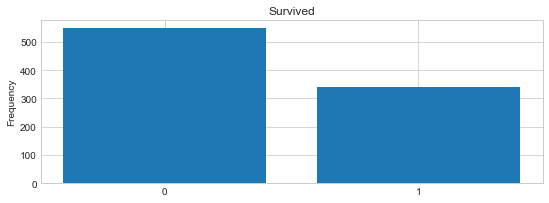

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


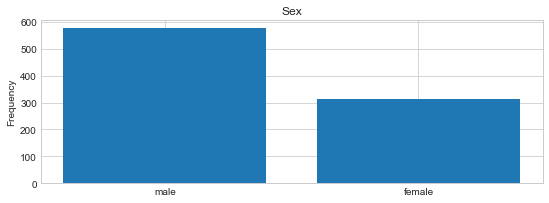

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


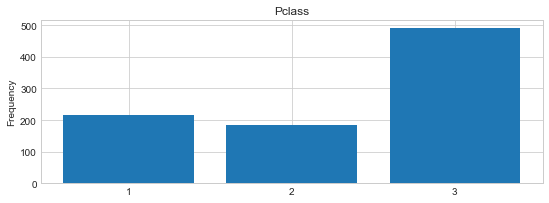

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


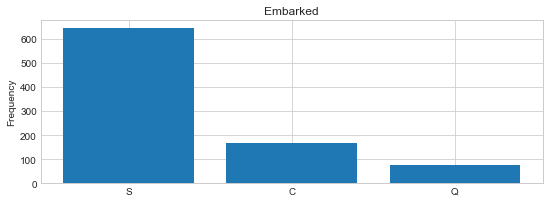

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


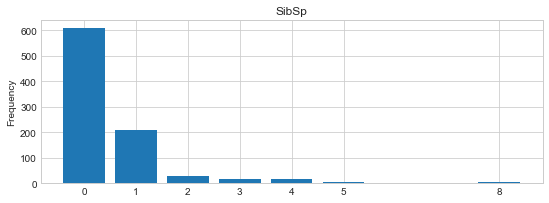

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


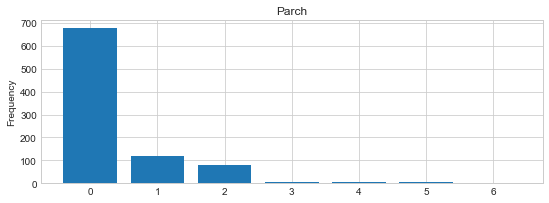

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [9]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for i in category1:
    bar_plot(i)

In [10]:
category2 = ["Cabin","Name","Ticket"]
for i in category2:
    print("{} : \n ".format(train_df[i].value_counts()))

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
D49            1
D7             1
B101           1
E38            1
E12            1
Name: Cabin, Length: 147, dtype: int64 : 
 
Pettersson, Miss. Ellen Natalia            1
Ohman, Miss. Velin                         1
Daly, Mr. Eugene Patrick                   1
Williams, Mr. Charles Eugene               1
Kirkland, Rev. Charles Leonard             1
                                          ..
Tikkanen, Mr. Juho                         1
Petroff, Mr. Pastcho ("Pentcho")           1
Vander Planke, Mr. Leo Edmondus            1
Andersson, Master. Sigvard Harald Elias    1
Lesurer, Mr. Gustave J                     1
Name: Name, Length: 891, dtype: int64 : 
 
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
349910      1
330959      1
2648        1
2623        1
12233       1
Name: Ticket, Length: 681, dtype: int64 : 
 


<a id=3.2><br>
## Numerical Variable 

In [11]:
def hist_plot(veriable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[veriable],bins=50)
    plt.xlabel(veriable)
    plt.ylabel("frequency")
    plt.title("{} distribution with hist".format(veriable))
    plt.show()

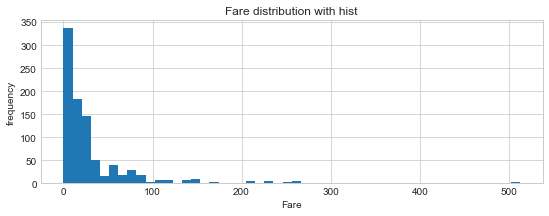

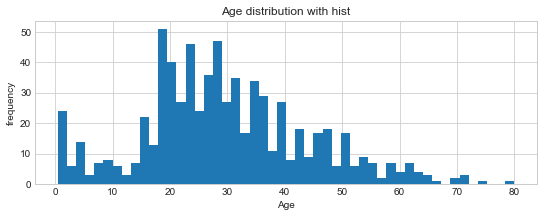

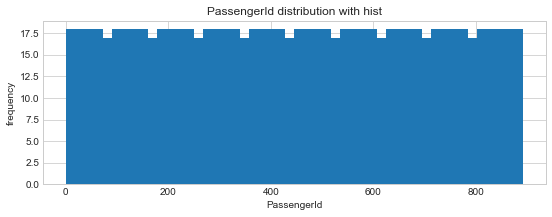

In [12]:
numeric_var = ["Fare","Age","PassengerId"]
for n in numeric_var:
    hist_plot(n)

<a id=4><br>
# Basic Data Analysis<br>

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived
   

In [13]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id=5><br>
# Outleir Dedection<br>

In [17]:
def detect_outliers(df,features):
    
    outlier_indices = []
    
    for c in features:
        # Q1 
        Q1 = np.percentile(df[c],25)
        # Q3
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 1.5
        # dedect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [18]:
cat = ["Age","SibSp","Parch","Fare"]
train_df.loc[detect_outliers(train_df,cat)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
# drop outlier
train_df = train_df.drop(detect_outliers(train_df,cat),axis=0).reset_index(drop=True)

<a id=6><br>
# Missing Value<br>
    

In [20]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id=6.1><br>
## Find Missing Value<br>

In [23]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [24]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id=6.2><br>
## Fill Missing Value<br>

* Embarked has 2 missing value
* Fare has only 1.

In [25]:
# Embarked missing value
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


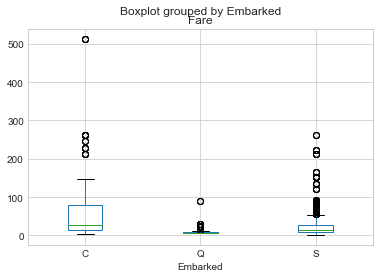

In [26]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [27]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
# Fare missing value
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [33]:
mean = np.mean(train_df[train_df["Pclass"]==3]["Fare"])
mean

12.741219971469327

In [35]:
train_df["Fare"] = train_df["Fare"].fillna(mean)
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
